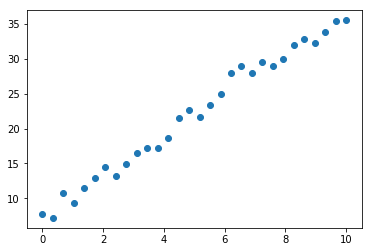

In [13]:
import numpy as np 
import tensorflow as tf
import matplotlib.pyplot as plt

%matplotlib inline

data_x = np.linspace(0,10,30)
data_y = data_x * 3 + 7 + np.random.normal(0,1,30)

plt.scatter(data_x, data_y)


In [58]:
#w = tf.Variable(1.0,  name='quanzhong')
w = tf.Variable(tf.constant(1.0))
b = tf.Variable(tf.constant(0.0), name='quanzhi')

x = tf.placeholder(tf.float32, shape=None, name='x')
y = tf.placeholder(tf.float32, shape=[None], name='y')

In [59]:
pred = tf.multiply(x, w) + b

In [60]:
loss = tf.reduce_sum( tf.squared_difference(pred, y) )

In [64]:
#learn_rate = 0.00001
global_steps = tf.Variable(0, trainable=False)  
learn_rate = tf.train.exponential_decay(0.00001, global_steps, 10, 2, staircase=False)  

In [65]:
train_step = tf.train.GradientDescentOptimizer(learn_rate).minimize(loss)

In [66]:
with  tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(10000):
      sess.run(train_step, feed_dict={x:data_x,y:data_y})
      if i%1000 == 0:
        print(sess.run([loss,w,b,learn_rate], feed_dict={x:data_x,y:data_y}))

    print(sess.run(12*w+b))

[9333.5596, 1.061335, 0.010221658, 9.9999997e-06]
[316.99493, 3.8084311, 1.4453254, 9.9999997e-06]
[241.06129, 3.6804829, 2.3064418, 9.9999997e-06]
[185.28534, 3.5708249, 3.0444624, 9.9999997e-06]
[144.31598, 3.4768422, 3.6769831, 9.9999997e-06]
[114.22275, 3.3962951, 4.2190819, 9.9999997e-06]
[92.118233, 3.3272624, 4.6836867, 9.9999997e-06]
[75.881668, 3.2680974, 5.0818768, 9.9999997e-06]
[63.955452, 3.217391, 5.4231434, 9.9999997e-06]
[55.195129, 3.1739321, 5.7156281, 9.9999997e-06]
43.6067


In [1]:
import numpy as np 
import tensorflow as tf
import matplotlib.pyplot as plt


data_x = np.linspace(0,10,30)
data_y = data_x * 3 + 7 + np.random.normal(0,1,30)

plt.scatter(data_x, data_y)

#print(data_y)


# 1. 定义参数；2.输入训练数据；3.执行推断；4.计算损失；5.训练模型，减少损失；6.评估

# y = w*x + b;
#定义参数
w = tf.Variable(1., name='quanzhong')
b = tf.Variable(0., name='pianzhi')

# 占位符
# 输入训练数据
x = tf.placeholder(tf.float32, shape=[None])
y = tf.placeholder(tf.float32, shape=[None])

# 执行推断 
# pred = x * w + b
pred = tf.multiply(x, w) + b

# 计算损失
# 计算x 和y 之间的平方差后，相加
loss = tf.reduce_sum(tf.squared_difference(pred, y))

# 训练模型
# 梯度下降算法
# 学习速率
learn_rate = 0.0001
# 调用 GradientDescentOptimizer 梯度下降算法，目标为最小化loss
# 模型
train_step = tf.train.GradientDescentOptimizer(learn_rate).minimize(loss)

# 训练
sess = tf.Session()
# 初始化变量
sess.run(tf.global_variables_initializer())

# 训练1万次
for i in range(10000):
  sess.run(train_step, feed_dict={x:data_x,y:data_y})
  if i%1000 == 0:
    print(sess.run([loss,w,b], feed_dict={x:data_x,y:data_y}))

print(sess.run(12*w+b))
saver = tf.train.Saver()

# builder = tf.saved_model.builder.SavedModelBuilder("E:\program\Learn\机器学习\实践\线性回归\Model")
# builder.add_meta_graph_and_variables(sess, ['tag_string'])
# builder.save()

#saver.save(sess, "Model/model.ckpt")

#writer = tf.summary.FileWriter('D://log', sess.graph);

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


[6242.8047, 1.6154441, 0.101747766]
[52.640125, 3.203501, 5.582169]
[38.02762, 3.0406525, 6.67817]
[37.36095, 3.0058687, 6.9122744]
[37.33051, 2.9984396, 6.962275]
[37.329117, 2.9968514, 6.972957]
[37.32908, 2.9965146, 6.9752274]
[37.32907, 2.996445, 6.975699]
[37.32907, 2.996445, 6.975699]
[37.32907, 2.996445, 6.975699]
42.93304
